# Simulating Chaotic Circuit in Python

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from tools import Circuit, local_max, unique_maxs, phase_diagram
from datetime import datetime as dt
import pytz # for seting datetime timezone

### Test Circuit, Time Series &amp; Phase Portrait

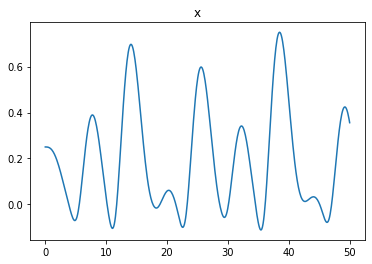

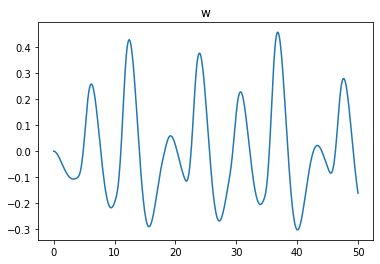

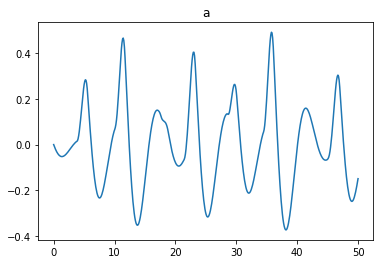

0.047


(-0.5, 0.8)

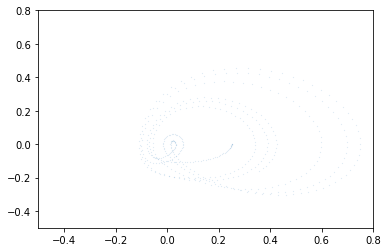

In [ ]:
test = Circuit(90)
x = np.linspace(0,50,500)
y0 = [0.25, 0, 0]
tspan = (0, max(x))
sol = test.solve(tspan, y0, plot = True, phase = False, t_eval = x) # lol nope lmao, good catch
print(test.Tc)
phase_diagram(sol, '.', markersize = 0.1)
plt.xlim((-0.5,0.8))
plt.ylim((-0.5,0.8))

### Generate Power Spectrum

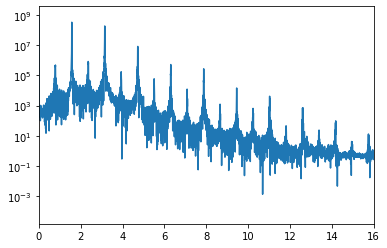

In [3]:
# Power Spectrum Code Sampled From https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

circuit = Circuit(66.4)
time_arr = np.linspace(200,5200,200000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = circuit.solve(tspan, y0,  t_eval = time_arr)
timestep = max(time_arr)/len(time_arr)


p = np.abs(np.fft.rfft(sol.y[0]))**2 #xdat is in volts and power = V^2 / R so is perportional up to a resistance
f = np.linspace(0,1/(timestep*circuit.Tc*2),len(p))
plt.plot(f, p)


plt.xlim(0,16)
plt.yscale("log")

[4.84493900e+05 3.32914172e+08 8.37784006e+05 1.88327552e+08
 1.74231049e+05 8.31755225e+06 5.95361889e+04 5.24773631e+05
 1.23030008e+04 2.73238080e+05 1.23652445e+03 1.46340929e+04
 6.52241073e+02 4.16222853e+03 4.56602520e+01 7.28959230e+02
 2.38354356e+01 9.72329446e+01 4.18778757e+00 1.31041204e+01
 1.00708383e+00 3.39244646e+00 7.94630549e-01 3.68496093e+00
 3.41391314e+00 5.87501628e-01 2.16833858e+00 3.89613116e-01
 1.09271128e+00]
[ 194  385  577  770  962 1156 1347 1541 1732 1926 2117 2311 2502 2696
 2888 3083 3273 3468 3654 3850 4045 4238 4430 4624 5006 5193 5394 5575
 5778]


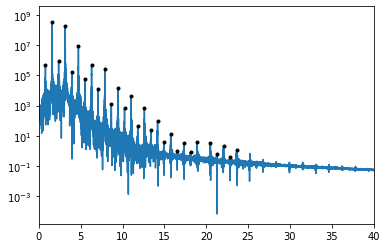

In [4]:
plt.plot(f, p)
plt.xlim(0,40)
plt.yscale("log")

maxs, indexes = local_max(p[:6000], N = 100)
print(maxs)
print(indexes)

plt.plot(f[indexes], maxs, 'k.')
lowest_f = f[indexes[0]]



### Generate Bifurcation Plot

In [27]:
Rv_arr = np.arange(40,120,0.1) # some padding on both sides
y0 = [0.25, 0, 0]
time_arr = np.linspace(600,900,2000)
tspan = (0, max(time_arr))
bifurcation = circuit.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9)
print(len(bifurcation))

800
/work/Analysis/tools.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


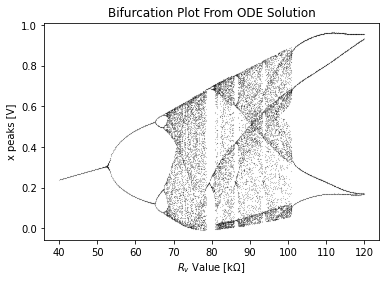

In [47]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.15)


plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")

tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())


plt.savefig("/work/Notes/Simulation/"+dateString+"-700s_settling_NumericalBifurcation.pdf",dpi = 300)

In [49]:
def find_splitting(Rv_arr):
    indexes = []
    split = True
    for index, sub_array in enumerate(Rv_arr):
        split = True
        if len(sub_array) == 2 and len(indexes) == 0:
            for Rv in Rv_arr[index: index + 20]:
                if len(Rv) < 2:
                    split = False
            if split:        
                indexes.append(index)
        
        if len(sub_array) == 4 and len(indexes) == 1:
            for Rv in Rv_arr[index: index + 20]:
                if len(Rv) < 4:
                    split = False
            if split:        
                indexes.append(index)

    return indexes

index1, index2 = find_splitting(bifurcation)

print(Rv_arr[index1])
print(Rv_arr[index2])

#lol that's such shit code but I think it works, 64.9 and 53.4 seem re
# hm ok

[]


In [23]:
Rv_arr = np.arange(60, 70,0.02) # some padding on both sides
y0 = [0.25, 0, 0]
time_arr = np.linspace(600,900,2000)
tspan = (0, max(time_arr))
bifurcation = circuit.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9)
print(len(bifurcation))

500
/work/Analysis/tools.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


Text(0.5, 0, '$R_v$ Value [k$\\Omega$]')

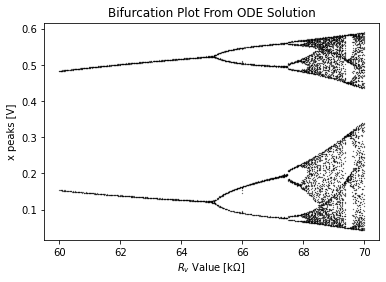

In [24]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.5)


plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>